# This Code is focused on teaching the basics of sound in python

In [79]:
"""
    Import Libraries
"""
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt

## Music Pure Frequencies Dictionary
Responsible to generate a dictionary with the keys being the notes 'A0',...'C8'
and the values being their correspondent frequency
       
Each note being a multiple between the base frequency 440

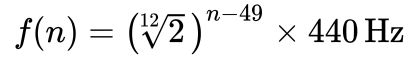

Well described by Wikipedia page: https://en.wikipedia.org/wiki/Piano_key_frequencies


In [115]:
def get_piano_notes():
    
    """
    Here a dictionary for the theorical frequencies
    of a piano notes is built through the function get_piano_notes()
    """

    # White keys are in Uppercase and black keys (sharps) are in lowercase
    octave = ['C', 'c', 'D', 'd', 'E', 'F', 'f', 'G', 'g', 'A', 'a', 'B'] 
    
    #Frequency of Note A4
    base_freq = 440 
    
    #Build a list of keys to the dictionary
    keys = np.array([x+str(y) for y in range(0,9) for x in octave])
    
    # Trim to standard 88 keys
    start = np.where(keys == 'A0')[0][0]
    end = np.where(keys == 'C8')[0][0]
    keys = keys[start:end+1]
    
    # Use dict and the zip function to create a 2 columns array uniting the keys 
    # with their corresponding calculated frequencies in a dictionary
    note_freqs = dict(zip(keys, [2**((n+1-49)/12)*base_freq for n in range(len(keys))]))
    note_freqs[''] = 0.0 # stop
    
    #return the dictionary
    return note_freqs

## Wave over time builder

This function is responsible for :
    <p>1. Create a time axis that will be used to insert the desired wave.
        <pre><h6>Uses <a href="https://numpy.org/doc/stable/reference/generated/numpy.linspace.html">linspace</a>, a function that returns evenly spaced numbers, calculated over an interval [start,stop]
<p>2. Insert the wave over the time frame
<br><pre><img src="https://www.mathsisfun.com/algebra/images/a-sin-bxcd.svg">

In [116]:
def get_sine_wave(frequency, duration, sample_rate=44100, amplitude=4096):
    """
    Define a funtion to get the sine wave of a selected frequency
    
    Parameters
        frequency    > frequency of the desired wave
        duration     > Duration of the time space in seconds
        sample_rate  > Quality of sound
        amplitude    > Volume of sound
    
    Returns
        Wave         > Array with sin wave over time
    """
    
    t = np.linspace(0, duration, int(sample_rate*duration)) # Time axis
    wave = amplitude*np.sin(2*np.pi*frequency*t)
    return wave

(88200,)


Text(0.5, 1.0, 'Basic time frame')

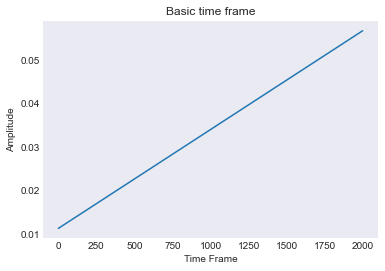

In [117]:
"""
    Sample of using the wave builder without being in a function
"""

#Import the dictionary built by the function get_piano_notes()
note_freqs = get_piano_notes()

#Setup of base parameters
duration = 2
sample_rate = 44100
amplitude = 2048
frequency = 110

#Function to create the time axis
##linspace returns evenly spaced numbers, calculated over an interval [start,stop]
t = np.linspace(0,duration,int(sample_rate*duration)) #time axis
print(np.shape(t))

#ploting time
plt.style.use('seaborn-dark')
plt.plot(t[500:2500])
plt.xlabel('Time Frame')
plt.ylabel('Amplitude')
plt.title('Basic time frame')

(88200,)


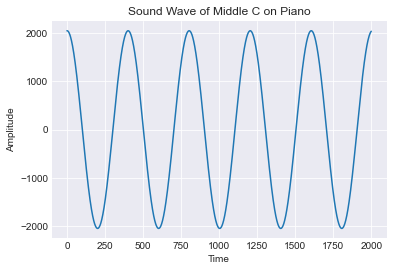

In [118]:
"""
    Inserting the wave into the time frame created above
"""
wave = amplitude*np.sin(2*np.pi*frequency*t)
print(np.shape(wave))

# Plot sound wave
plt.plot(wave[500:2500])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Sound Wave of Middle C on Piano')
plt.grid()

# Build a perfect "C5" note and save in a wav file

This step will:
<ol>
    <li>Retrieve the dictionary of frequencies through get_piano_notes()
    <li>Choose one of the frequencies from the dictionary ("A0")
    <li>Create a sine wave with the frequency from the note "A0"
    <li>Save the created note in a .wav file
</ol>

In [123]:
#Get the dictionary of frequencies
note_freqs = get_piano_notes()

#Select the frequency of C5 from the dictionary
frequency = note_freqs['C5']

#Create the pure C5 wave using the frequency 
sine_wave = get_sine_wave(frequency, duration=2, amplitude=2048)

#Save a wav file with the tone
wavfile.write('middle_C.wav', rate=44100, data=sine_wave.astype(np.int16))

# Now the idea is to read a file with a piano C tone and work with it's fourier transform

On the next steps we will
<ol>
    <li> Load the sound of a piano C sound
    <li> Plot the piano C sound
    <li> Calculate the Fast Fourier Transform of the piano C sound
    <li> Plot the FFT in a frequency x amplitude graph

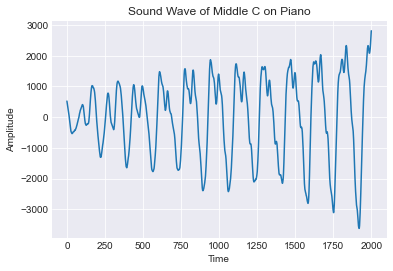

In [125]:
plt.style.use('seaborn-dark')

# Load data from wav file
sample_rate, middle_c = wavfile.read('data/piano_c.wav')

# Plot sound wave
plt.plot(middle_c[500:2500])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Sound Wave of Middle C on Piano')
plt.grid()

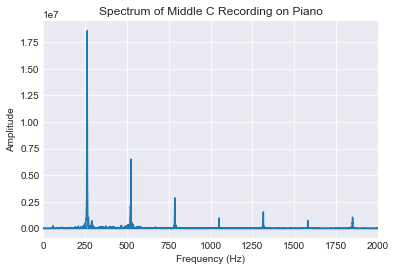

In [126]:
#Fast Fourier Transform FFT
t = np.arange(middle_c.shape[0])
freq = np.fft.fftfreq(t.shape[-1])*sample_rate
sp = np.fft.fft(middle_c) 

# Plot spectrum
plt.plot(freq, abs(sp.real))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Spectrum of Middle C Recording on Piano')
plt.xlim((0, 2000))
plt.grid()